### This task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights uncovered.

##### The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.

##### Data Preparation

#####  Data cleaning in order to prepare the data for analysis. 

##### Data analysis is used to uncover some insights. 

##### Sentiment analysis to provide some insight into the content of the reviews.

##### Visualization of analyzed sentiments to understand the perception of customers about British Airways.

# Web scraping and analysis


## Import required libraries 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
## Scraping reviews for British Airways

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
## Placing extracted data into a dataframe

df = pd.DataFrame(np.array(reviews), columns=['reviews'])

In [4]:
df.head(10)

,reviews
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,✅ Trip Verified | Probably the worst business ...
4,"✅ Trip Verified | Definitely not recommended, ..."
5,✅ Trip Verified | BA shuttle service across t...
6,✅ Trip Verified | I must admit like many other...
7,Not Verified | When will BA update their Busi...
8,✅ Trip Verified | Paid £200 day before flight...
9,✅ Trip Verified | BA website did not work (we...


## Data Cleaning to remove unwanted columns

In [5]:
# Data cleaning to ensure the column is concise for analysis

df["reviews"] = df["reviews"].replace("Trip Verified |", "", regex=True)
df["reviews"] = df["reviews"].replace("Not Verified |", "", regex=True)
df["reviews"] = df["reviews"].replace("\u2705","", regex=True)
df['reviews'] = df['reviews'].str.replace('[|]', '', regex= True)
df

,reviews
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...
1,Great thing about British Airways A380 is th...
2,"The staff are friendly. The plane was cold, w..."
3,Probably the worst business class experience...
4,"Definitely not recommended, especially for b..."
...,...
3449,Flew LHR - VIE return operated by bmi but BA a...
3450,LHR to HAM. Purser addresses all club passenge...
3451,My son who had worked for British Airways urge...
3452,London City-New York JFK via Shannon on A318 b...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3454 non-null   object
dtypes: object(1)
memory usage: 27.1+ KB


# Analyzing the data

In [7]:
# Extracting crucial metrics from the scrapped data
# First = the wordcount of each review
# creating a new column known as "wordcount"

df["word_count"] = df['reviews'].apply(lambda x: len(x.split()))
df

,reviews,word_count
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...,270
1,Great thing about British Airways A380 is th...,168
2,"The staff are friendly. The plane was cold, w...",112
3,Probably the worst business class experience...,584
4,"Definitely not recommended, especially for b...",138
...,...,...
3449,Flew LHR - VIE return operated by bmi but BA a...,81
3450,LHR to HAM. Purser addresses all club passenge...,25
3451,My son who had worked for British Airways urge...,230
3452,London City-New York JFK via Shannon on A318 b...,33


In [8]:
# Secondly = Character count of eacch review

df["character_count"] = df['reviews'].apply(lambda x: len(x))
df

,reviews,word_count,character_count
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...,270,1479
1,Great thing about British Airways A380 is th...,168,931
2,"The staff are friendly. The plane was cold, w...",112,612
3,Probably the worst business class experience...,584,3411
4,"Definitely not recommended, especially for b...",138,784
...,...,...,...
3449,Flew LHR - VIE return operated by bmi but BA a...,81,456
3450,LHR to HAM. Purser addresses all club passenge...,25,144
3451,My son who had worked for British Airways urge...,230,1171
3452,London City-New York JFK via Shannon on A318 b...,33,188


In [9]:
# Thirdly = create a function to determine
# average word in each review

def avg_word(reviews):
    words = reviews.split()
    return (sum(len(word) for word in words) / len(words))

In [10]:
# create a column for average word

df['avg_word'] = df['reviews'].apply(lambda x: avg_word(x))
df

,reviews,word_count,character_count,avg_word
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...,270,1479,4.462963
1,Great thing about British Airways A380 is th...,168,931,4.523810
2,"The staff are friendly. The plane was cold, w...",112,612,4.464286
3,Probably the worst business class experience...,584,3411,4.839041
4,"Definitely not recommended, especially for b...",138,784,4.673913
...,...,...,...,...
3449,Flew LHR - VIE return operated by bmi but BA a...,81,456,4.641975
3450,LHR to HAM. Purser addresses all club passenge...,25,144,4.800000
3451,My son who had worked for British Airways urge...,230,1171,4.095652
3452,London City-New York JFK via Shannon on A318 b...,33,188,4.727273


In [11]:
# Fourthly - Determine the stopword count
# Import stopwords library

from nltk.corpus import stopwords

In [12]:
stop_words = stopwords.words('English')
df['stopword_count'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df

,reviews,word_count,character_count,avg_word,stopword_count
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...,270,1479,4.462963,102
1,Great thing about British Airways A380 is th...,168,931,4.523810,68
2,"The staff are friendly. The plane was cold, w...",112,612,4.464286,47
3,Probably the worst business class experience...,584,3411,4.839041,230
4,"Definitely not recommended, especially for b...",138,784,4.673913,53
...,...,...,...,...,...
3449,Flew LHR - VIE return operated by bmi but BA a...,81,456,4.641975,30
3450,LHR to HAM. Purser addresses all club passenge...,25,144,4.800000,7
3451,My son who had worked for British Airways urge...,230,1171,4.095652,96
3452,London City-New York JFK via Shannon on A318 b...,33,188,4.727273,10


In [13]:
df.describe()

,word_count,character_count,avg_word,stopword_count
count,3454.000000,3454.00000,3454.000000,3454.000000
mean,161.031558,888.98784,4.570569,65.733932
std,105.602788,571.48042,0.313439,46.361198
min,15.000000,83.00000,3.677083,1.000000
25%,86.000000,483.50000,4.354167,33.000000
50%,134.000000,747.00000,4.542195,54.000000
75%,203.750000,1120.00000,4.749679,84.000000
max,655.000000,3535.00000,6.062500,323.000000


# Natural Language Processing

## Data Cleaning

### Lowercasing all words

### Removing punctuation

### Removing stopwords

In [14]:
# converting the words in the review to lower case

df['review_lower'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review_lower']

0       flew atl to lhr 8th jan 2023. was unlucky enou...
1       great thing about british airways a380 is the ...
2       the staff are friendly. the plane was cold, we...
3       probably the worst business class experience i...
4       definitely not recommended, especially for bus...
                              ...                        
3449    flew lhr - vie return operated by bmi but ba a...
3450    lhr to ham. purser addresses all club passenge...
3451    my son who had worked for british airways urge...
3452    london city-new york jfk via shannon on a318 b...
3453    sin-lhr ba12 b747-436 first class. old aircraf...
Name: review_lower, Length: 3454, dtype: object

In [15]:
# Punctuation removal

df['no-punctuation_review'] = df['review_lower'].str.replace('[^\w\s]', '', regex= True)
df

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...,270,1479,4.462963,102,flew atl to lhr 8th jan 2023. was unlucky enou...,flew atl to lhr 8th jan 2023 was unlucky enoug...
1,Great thing about British Airways A380 is th...,168,931,4.523810,68,great thing about british airways a380 is the ...,great thing about british airways a380 is the ...
2,"The staff are friendly. The plane was cold, w...",112,612,4.464286,47,"the staff are friendly. the plane was cold, we...",the staff are friendly the plane was cold we w...
3,Probably the worst business class experience...,584,3411,4.839041,230,probably the worst business class experience i...,probably the worst business class experience i...
4,"Definitely not recommended, especially for b...",138,784,4.673913,53,"definitely not recommended, especially for bus...",definitely not recommended especially for busi...
...,...,...,...,...,...,...,...
3449,Flew LHR - VIE return operated by bmi but BA a...,81,456,4.641975,30,flew lhr - vie return operated by bmi but ba a...,flew lhr vie return operated by bmi but ba ai...
3450,LHR to HAM. Purser addresses all club passenge...,25,144,4.800000,7,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...
3451,My son who had worked for British Airways urge...,230,1171,4.095652,96,my son who had worked for british airways urge...,my son who had worked for british airways urge...
3452,London City-New York JFK via Shannon on A318 b...,33,188,4.727273,10,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...


In [16]:
# Remove Stopwords from review with no punctuation

df['review_nopunc_nostop'] = df['no-punctuation_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review,review_nopunc_nostop
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...,270,1479,4.462963,102,flew atl to lhr 8th jan 2023. was unlucky enou...,flew atl to lhr 8th jan 2023 was unlucky enoug...,flew atl lhr 8th jan 2023 unlucky enough board...
1,Great thing about British Airways A380 is th...,168,931,4.523810,68,great thing about british airways a380 is the ...,great thing about british airways a380 is the ...,great thing british airways a380 economy secti...
2,"The staff are friendly. The plane was cold, w...",112,612,4.464286,47,"the staff are friendly. the plane was cold, we...",the staff are friendly the plane was cold we w...,staff friendly plane cold shivering gave light...
3,Probably the worst business class experience...,584,3411,4.839041,230,probably the worst business class experience i...,probably the worst business class experience i...,probably worst business class experience ive e...
4,"Definitely not recommended, especially for b...",138,784,4.673913,53,"definitely not recommended, especially for bus...",definitely not recommended especially for busi...,definitely recommended especially business cla...
...,...,...,...,...,...,...,...,...
3449,Flew LHR - VIE return operated by bmi but BA a...,81,456,4.641975,30,flew lhr - vie return operated by bmi but ba a...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated bmi ba aircraft a...
3450,LHR to HAM. Purser addresses all club passenge...,25,144,4.800000,7,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr ham purser addresses club passengers name ...
3451,My son who had worked for British Airways urge...,230,1171,4.095652,96,my son who had worked for british airways urge...,my son who had worked for british airways urge...,son worked british airways urged fly british a...
3452,London City-New York JFK via Shannon on A318 b...,33,188,4.727273,10,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon a318 reall...


# Lemmatize the reviews


###### This cuts out the number of words that are available for analysis by combining similar forms into one base form.


In [17]:
# Import textblob
from textblob import Word

# Lemmatize final review format
df['lemmatized_review'] = df['review_nopunc_nostop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Sentiment Analysis


In [18]:
# Calculate polarity
from textblob import TextBlob

df['polarity'] = df['lemmatized_review'].apply(lambda x: TextBlob(x).sentiment[0])

In [19]:
df.head(10)

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review,review_nopunc_nostop,lemmatized_review,polarity
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...,270,1479,4.462963,102,flew atl to lhr 8th jan 2023. was unlucky enou...,flew atl to lhr 8th jan 2023 was unlucky enoug...,flew atl lhr 8th jan 2023 unlucky enough board...,flew atl lhr 8th jan 2023 unlucky enough board...,-0.128452
1,Great thing about British Airways A380 is th...,168,931,4.523810,68,great thing about british airways a380 is the ...,great thing about british airways a380 is the ...,great thing british airways a380 economy secti...,great thing british airway a380 economy sectio...,0.069203
2,"The staff are friendly. The plane was cold, w...",112,612,4.464286,47,"the staff are friendly. the plane was cold, we...",the staff are friendly the plane was cold we w...,staff friendly plane cold shivering gave light...,staff friendly plane cold shivering gave light...,-0.065833
3,Probably the worst business class experience...,584,3411,4.839041,230,probably the worst business class experience i...,probably the worst business class experience i...,probably worst business class experience ive e...,probably worst business class experience ive e...,-0.095319
4,"Definitely not recommended, especially for b...",138,784,4.673913,53,"definitely not recommended, especially for bus...",definitely not recommended especially for busi...,definitely recommended especially business cla...,definitely recommended especially business cla...,-0.035185
5,BA shuttle service across the UK is still s...,96,511,4.302083,36,ba shuttle service across the uk is still surp...,ba shuttle service across the uk is still surp...,ba shuttle service across uk still surprisingl...,ba shuttle service across uk still surprisingl...,0.322222
6,I must admit like many others I tend to avoi...,151,812,4.370861,52,i must admit like many others i tend to avoid ...,i must admit like many others i tend to avoid ...,must admit like many others tend avoid ba long...,must admit like many others tend avoid ba long...,0.130556
7,When will BA update their Business class cab...,97,582,4.979381,32,when will ba update their business class cabin...,when will ba update their business class cabin...,ba update business class cabin 8 across 777 mu...,ba update business class cabin 8 across 777 mu...,0.152381
8,Paid £200 day before flight for an upgrade ...,184,985,4.342391,80,paid £200 day before flight for an upgrade fro...,paid 200 day before flight for an upgrade from...,paid 200 day flight upgrade economy premium ec...,paid 200 day flight upgrade economy premium ec...,0.056389
9,BA website did not work (weirdly deleted my...,137,783,4.700730,45,ba website did not work (weirdly deleted my fl...,ba website did not work weirdly deleted my fli...,ba website work weirdly deleted flight upcomin...,ba website work weirdly deleted flight upcomin...,-0.111483


In [20]:
# Calculate subjectivity
df['subjectivity'] = df['lemmatized_review'].apply(lambda x: TextBlob(x).sentiment[1])

In [21]:
df.head(10)

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review,review_nopunc_nostop,lemmatized_review,polarity,subjectivity
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...,270,1479,4.462963,102,flew atl to lhr 8th jan 2023. was unlucky enou...,flew atl to lhr 8th jan 2023 was unlucky enoug...,flew atl lhr 8th jan 2023 unlucky enough board...,flew atl lhr 8th jan 2023 unlucky enough board...,-0.128452,0.575476
1,Great thing about British Airways A380 is th...,168,931,4.523810,68,great thing about british airways a380 is the ...,great thing about british airways a380 is the ...,great thing british airways a380 economy secti...,great thing british airway a380 economy sectio...,0.069203,0.467837
2,"The staff are friendly. The plane was cold, w...",112,612,4.464286,47,"the staff are friendly. the plane was cold, we...",the staff are friendly the plane was cold we w...,staff friendly plane cold shivering gave light...,staff friendly plane cold shivering gave light...,-0.065833,0.428333
3,Probably the worst business class experience...,584,3411,4.839041,230,probably the worst business class experience i...,probably the worst business class experience i...,probably worst business class experience ive e...,probably worst business class experience ive e...,-0.095319,0.493371
4,"Definitely not recommended, especially for b...",138,784,4.673913,53,"definitely not recommended, especially for bus...",definitely not recommended especially for busi...,definitely recommended especially business cla...,definitely recommended especially business cla...,-0.035185,0.560648
5,BA shuttle service across the UK is still s...,96,511,4.302083,36,ba shuttle service across the uk is still surp...,ba shuttle service across the uk is still surp...,ba shuttle service across uk still surprisingl...,ba shuttle service across uk still surprisingl...,0.322222,0.472222
6,I must admit like many others I tend to avoi...,151,812,4.370861,52,i must admit like many others i tend to avoid ...,i must admit like many others i tend to avoid ...,must admit like many others tend avoid ba long...,must admit like many others tend avoid ba long...,0.130556,0.503571
7,When will BA update their Business class cab...,97,582,4.979381,32,when will ba update their business class cabin...,when will ba update their business class cabin...,ba update business class cabin 8 across 777 mu...,ba update business class cabin 8 across 777 mu...,0.152381,0.489286
8,Paid £200 day before flight for an upgrade ...,184,985,4.342391,80,paid £200 day before flight for an upgrade fro...,paid 200 day before flight for an upgrade from...,paid 200 day flight upgrade economy premium ec...,paid 200 day flight upgrade economy premium ec...,0.056389,0.580000
9,BA website did not work (weirdly deleted my...,137,783,4.700730,45,ba website did not work (weirdly deleted my fl...,ba website did not work weirdly deleted my fli...,ba website work weirdly deleted flight upcomin...,ba website work weirdly deleted flight upcomin...,-0.111483,0.690097


In [22]:
df.describe()

,word_count,character_count,avg_word,stopword_count,polarity,subjectivity
count,3454.000000,3454.00000,3454.000000,3454.000000,3454.000000,3454.000000
mean,161.031558,888.98784,4.570569,65.733932,0.105371,0.480493
std,105.602788,571.48042,0.313439,46.361198,0.185651,0.115249
min,15.000000,83.00000,3.677083,1.000000,-0.766667,0.000000
25%,86.000000,483.50000,4.354167,33.000000,-0.014230,0.411806
50%,134.000000,747.00000,4.542195,54.000000,0.100276,0.481221
75%,203.750000,1120.00000,4.749679,84.000000,0.220574,0.548258
max,655.000000,3535.00000,6.062500,323.000000,0.800000,1.000000


In [23]:
# Remove unnecessary columns


df.drop(columns=['review_lower','no-punctuation_review', 'review_nopunc_nostop', 'lemmatized_review'], inplace=True)

In [24]:
df.head(10)

,reviews,word_count,character_count,avg_word,stopword_count,polarity,subjectivity
0,Flew ATL to LHR 8th Jan 2023. Was unlucky e...,270,1479,4.462963,102,-0.128452,0.575476
1,Great thing about British Airways A380 is th...,168,931,4.523810,68,0.069203,0.467837
2,"The staff are friendly. The plane was cold, w...",112,612,4.464286,47,-0.065833,0.428333
3,Probably the worst business class experience...,584,3411,4.839041,230,-0.095319,0.493371
4,"Definitely not recommended, especially for b...",138,784,4.673913,53,-0.035185,0.560648
5,BA shuttle service across the UK is still s...,96,511,4.302083,36,0.322222,0.472222
6,I must admit like many others I tend to avoi...,151,812,4.370861,52,0.130556,0.503571
7,When will BA update their Business class cab...,97,582,4.979381,32,0.152381,0.489286
8,Paid £200 day before flight for an upgrade ...,184,985,4.342391,80,0.056389,0.580000
9,BA website did not work (weirdly deleted my...,137,783,4.700730,45,-0.111483,0.690097


In [25]:
df.sort_values(by="polarity")

,reviews,word_count,character_count,avg_word,stopword_count,polarity,subjectivity
573,Mykonos to London flight delayed and waitin...,59,314,4.254237,25,-0.766667,0.866667
581,Stockholm to London. Worst business class f...,38,225,4.842105,16,-0.650000,0.783333
182,The food was awful. An over night early morn...,38,231,5.052632,11,-0.642857,0.857143
742,Miami to London. The breakfast served just ...,37,222,4.945946,14,-0.622917,0.635417
1175,Verified Review Flew London Heathrow to Mad...,68,409,4.985294,28,-0.583333,0.666667
...,...,...,...,...,...,...,...
1870,London Heathrow to Dublin. On time departure a...,52,321,5.192308,16,0.700000,0.600000
534,Edinburgh to Kuala Lumpur via London. I hav...,89,473,4.280899,33,0.716667,0.625000
3103,Very impressed with Premium Economy on BA Sydn...,26,156,5.038462,10,0.800000,1.000000
3099,Very impressed with Premium Economy on BA Sydn...,26,156,5.038462,10,0.800000,1.000000


# Data Visualization

####  Subjectivity will be analyzed, this will establish a relationship between the text in the review and personal emotion or factual information on a scale of 0 to 1. Scores close to 1 will indicate a higher level of subjectivity and being based mostly on opinion.

#### The polarity metric refers to the degree to which the text analysed is positive or negative, between a range of -1 to 1. A score of 1 means highly positive whereas -1 is considered well and truly negative.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([  14.,   28.,  134.,  564., 1246., 1030.,  332.,   81.,   16.,
           9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

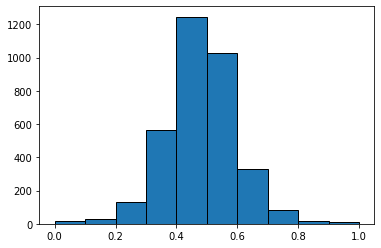

In [27]:
plt.hist(df["subjectivity"], edgecolor = "black")

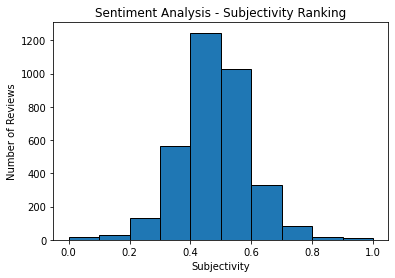

In [28]:
plt.hist(df["subjectivity"], edgecolor = "black")
plt.xlabel("Subjectivity")
plt.ylabel ("Number of Reviews")
plt.title("Sentiment Analysis - Subjectivity Ranking")
plt.savefig("Subjectivity.jpeg")

(array([   4.,   12.,   49.,  197.,  826., 1218.,  769.,  305.,   60.,
          14.]),
 array([-0.76666667, -0.61      , -0.45333333, -0.29666667, -0.14      ,
         0.01666667,  0.17333333,  0.33      ,  0.48666667,  0.64333333,
         0.8       ]),
 <BarContainer object of 10 artists>)

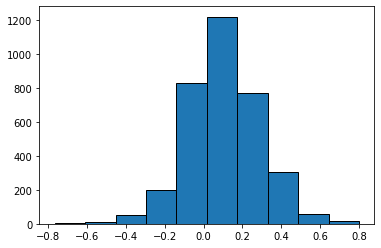

In [29]:
plt.hist(df["polarity"], edgecolor = "black")


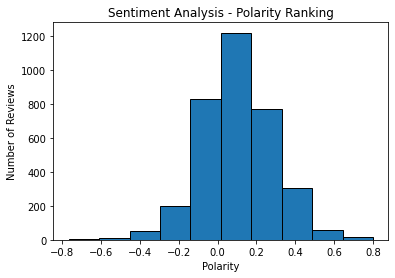

In [30]:
plt.hist(df["polarity"], edgecolor = "black")
plt.xlabel("Polarity")
plt.ylabel ("Number of Reviews")
plt.title("Sentiment Analysis - Polarity Ranking")
plt.savefig("barchart.png", format ="pdf")

array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

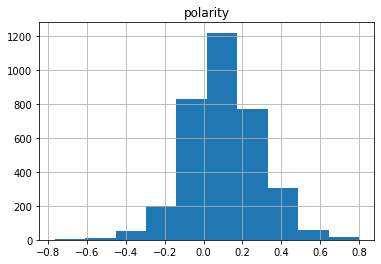

In [31]:
df.hist("polarity")